In [5]:
import glob
import json
import os
from tqdm import tqdm
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


In [57]:
dirs = [ f.name for f in os.scandir('/home/mayank/MTP/begin_again/Error-Driven-ASR-Personalization/CMU_expts/accent-without/') if f.is_dir() ]
dirs.remove('.ipynb_checkpoints')
print(dirs)

['hindi', 'chinese', 'spanish', 'arabic', 'korean', 'vietnamese']


In [58]:
# dirs = ['SKA', 'MBMPS', 'THV']

# dirs = ['ABA', 'ASI', 'BWC', 'EBVS', 'ERMS', 'HJK', 'HKK', 'HQTV', 'NCC', 'NJS', 'PNV', 
#         'RRBI', 'SVBI', 'TLV', 'TNI', 'TXHC', 'YBAA', 'YDCK', 'YKWK', 'ZHAA']
accent_map = {"ABA":"arabic","SKA":"arabic","YBAA":"arabic","ZHAA":"arabic",
              "BWC":"chinese","LXC":"chinese","NCC":"chinese","TXHC":"chinese",
              "ASI":"hindi","RRBI":"hindi","SVBI":"hindi","TNI":"hindi",
              "HJK":"korean","HKK":"korean","YDCK":"korean","YKWK":"korean",
              "EBVS":"spanish","ERMS":"spanish","MBMPS":"spanish","NJS":"spanish",
              "HQTV":"vietnamese","PNV":"vietnamese","THV":"vietnamese","TLV":"vietnamese"
              }
accent_base_dir = '/home/mayank/MTP/begin_again/Error-Driven-ASR-Personalization/CMU_expts/accent-without/'
base_dir = '/home/mayank/MTP/begin_again/Error-Driven-ASR-Personalization/CMU_expts/accent-without/'
accent_dirs = list(set(map(accent_map.get, dirs)))
print(accent_dirs)

[None]


In [7]:
import pickle 
import numpy as np

def load_features(file_dir, feature):
    features = []
    with open(file_dir.replace('.json', '_'+feature+'.file'), 'rb') as f:
        while True:
            try:
                features.append(pickle.load(f))
            except EOFError:
                break
    print(features[-1].shape)
    features = np.concatenate(features, axis=0)
    return features


dirs = ['hindi', 'chinese', 'spanish', 'arabic', 'korean', 'vietnamese']
print(dirs)
base_dir = '/home/mayank/MTP/begin_again/Error-Driven-ASR-Personalization/CMU_expts/accent-without/'

['hindi', 'chinese', 'spanish', 'arabic', 'korean', 'vietnamese']


In [61]:
ground_list, ground_list_Y, ground_features = [], [], []
for i, _dir in enumerate(dirs):
    selection_file_path = base_dir + _dir + '/manifests/test.json'
    selection_file_list = [json.loads(line.strip()) for line in open(selection_file_path)]
    selection_file_list = selection_file_list
    ground_list.extend(selection_file_list)
    ground_features.append(load_features(selection_file_path, "wv8"))
    print(_dir+" has "+str(len(selection_file_list))+" samples.")
    ground_list_Y.extend([i]*len(selection_file_list))
    
ground_features = np.concatenate(ground_features, axis=0)
ground_features_Y = np.asarray(ground_list_Y).reshape(-1, 1) 
print(len(ground_list), ground_features.shape, ground_features_Y.shape)

(1, 8)
hindi has 1224 samples.
(1, 8)
chinese has 1224 samples.
(1, 8)
spanish has 1191 samples.
(1, 8)
arabic has 1182 samples.
(1, 8)
korean has 1224 samples.
(1, 8)
vietnamese has 1224 samples.
7269 (7269, 8) (7269, 1)


In [62]:

def _color_map(dirs):
#     color = ["midnightblue", "royalblue", "indigo", "darkgreen", 'lime', "green", 'pink', 'fuchsia', 'red', 
#              'yellow', 'black']
    color = ["midnightblue", "darkgreen", 'lime', 'pink', 'red', 
             'yellow', 'black']
    color_map = {}
    for _dir, color in zip(dirs+['query_set', 'selected_set'], color):
        color_map[_dir] = color
    return color_map

In [63]:
X, y = ground_features, ground_features_Y

print(X.shape, y.shape)
print('\n\n')
feat_cols = ['dim'+str(i) for i in range(X.shape[1])]
df = pd.DataFrame(X, columns=feat_cols)
df['y'] = y

label_map = dict(enumerate(dirs))
df['label'] = df['y'].apply(lambda i: label_map[i])

(7269, 8) (7269, 1)





In [64]:
perp=0.83*(X.shape[0]**0.5)
iters=3000
tsne = TSNE(n_components=2, verbose=1, perplexity=perp, n_iter=iters)
tsne_results = tsne.fit_transform(df[feat_cols].values)

df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]

[t-SNE] Computing 213 nearest neighbors...
[t-SNE] Indexed 7269 samples in 0.035s...
[t-SNE] Computed neighbors for 7269 samples in 0.729s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7269
[t-SNE] Computed conditional probabilities for sample 2000 / 7269
[t-SNE] Computed conditional probabilities for sample 3000 / 7269
[t-SNE] Computed conditional probabilities for sample 4000 / 7269
[t-SNE] Computed conditional probabilities for sample 5000 / 7269
[t-SNE] Computed conditional probabilities for sample 6000 / 7269
[t-SNE] Computed conditional probabilities for sample 7000 / 7269
[t-SNE] Computed conditional probabilities for sample 7269 / 7269
[t-SNE] Mean sigma: 0.478057
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.986435
[t-SNE] KL divergence after 3000 iterations: 1.177781


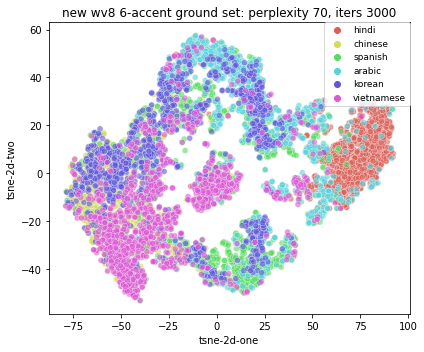

<Figure size 7200x4800 with 0 Axes>

In [65]:
fig = plt.figure(figsize=(6,5))
_ax = fig.add_subplot(1,1,1)
_ax.title.set_text('new wv8 {}-accent ground set: perplexity {}, iters {}'.format(len(dirs), int(perp), iters))
g = sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", len(dirs)),
    data=df,
    legend="full",
#     markers= [0.5]*y.shape[0],
#     legend=False,
    alpha=0.6,
    ax = _ax
)
plt.figure(dpi=1200)
# plt.legend(loc='upper right')
g.legend(
         loc='upper right', 
#          loc=1,
         bbox_to_anchor=(1.013, 1.017), 
         prop={'size':9}, markerscale=1)
fig.tight_layout()

In [66]:
fig.savefig('L2_t-SNE-new-wv8-{}-{}.svg'.format(int(perp), iters)) # , bbox_inches='tight', pad_inches=0
# plt.close()

In [12]:
import random
import statistics

budget_size = 100
list_total_duration = []
for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    temp_ground_list = ground_list[:]
    random.seed(41 + i)
    random.shuffle(temp_ground_list)
    selected_list = temp_ground_list[:budget_size]     
    total_duration = sum([i['duration'] for i in selected_list])
    list_total_duration.append(total_duration)
print(list_total_duration)
print(statistics.mean(list_total_duration), statistics.variance(list_total_duration)**0.5)

[349.8313151927439, 348.55603174603175, 384.2055782312925, 368.39784580498855, 371.83752834467117, 349.4521541950115, 391.92988662131506, 382.27376417233575, 337.606394557823, 359.0694784580499]
364.3159977324263 18.177775872541453


In [18]:
import glob, json, os, time, pickle
from tqdm import tqdm
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

def _color_map(dirs):
    color = ["midnightblue", "darkgreen", 'lime', 'pink', 'red', 
             'yellow', 'black']
    color_map = {}
    for _dir, color in zip(dirs+['query_set', 'selected_set'], color):
        color_map[_dir] = color
    return color_map

def load_features(file_dir, feature):
    features = []
    with open(file_dir.replace('.json', '_'+feature+'.file'), 'rb') as f:
        while True:
            try:
                features.append(pickle.load(f))
            except EOFError:
                break
    print(features[-1].shape)
    features = np.concatenate(features, axis=0)
    return features


def df_from(file_type, feature, dirs):
    t1 = time.time()
    ground_list, ground_list_Y, ground_features = [], [], []
    for i, _dir in enumerate(dirs):
        
        selection_file_path = '../mz-isca/expts/' + _dir + '/manifests/{}.json'.format(file_type)
        selection_file_list = [json.loads(line.strip()) for line in open(selection_file_path)]
        selection_file_list = selection_file_list[:700]
        ground_list.extend(selection_file_list)
        ground_features.append(load_features(selection_file_path, feature)[:700])
        
        print(_dir+" has "+str(len(selection_file_list))+" samples.")
        ground_list_Y.extend([i]*len(selection_file_list))
    
    ground_features = np.concatenate(ground_features, axis=0)
    ground_features_Y = np.asarray(ground_list_Y).reshape(-1, 1) 
    print(len(ground_list), ground_features.shape, ground_features_Y.shape)
    
    X, y = ground_features, ground_features_Y
    
    print(X.shape, y.shape)
    print('\n\n')
    feat_cols = ['dim'+str(i) for i in range(X.shape[1])]
    df = pd.DataFrame(X, columns=feat_cols)
    df['y'] = y
    
    label_map = dict(enumerate(dirs))
    df['label'] = df['y'].apply(lambda i: label_map[i])

    perp=50
    iters=1500
    tsne = TSNE(n_components=2, verbose=1, perplexity=perp, n_iter=iters)
    tsne_results = tsne.fit_transform(df[feat_cols].values)

    df['tsne-2d-one'] = tsne_results[:,0]
    df['tsne-2d-two'] = tsne_results[:,1]
    
    t2 = time.time()
    print("in {:.1f} min".format((t2-t1)/60))
    return df

def tnse_plot(dirs, title, fname, df):
    perp, iters = 50, 2000
    fig = plt.figure(figsize=(6,5))
    _ax = fig.add_subplot(1,1,1)
    _ax.title.set_text('{} {}-accent ground set: perp {}, iters {}'.format(title, len(dirs), int(perp), iters))
    g = sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="label", palette=sns.color_palette("hls", len(dirs)), data=df, legend="full", alpha=0.6, ax = _ax)
    plt.figure(dpi=1200)
    g.legend(loc='upper right', bbox_to_anchor=(1.013, 1.017), prop={'size':9}, markerscale=1)
    fig.tight_layout()
    fig.savefig('{}-{}-{}.svg'.format(fname, int(perp), iters))
    plt.show()

In [19]:
dirs = ['african', 'indian', 'hongkong', 'philippines', 
        'england', 'scotland', 'us', 'ireland', 
       'canada', 'australia'
       'bermuda', 'malaysia']

train_dirs = ['african', 'indian', 'hongkong', 'philippines', 
           'england', 'scotland', 'us', 'ireland']

df_train = df_from("test", 'wv10_100', train_dirs)

(1, 100)
african has 500 samples.
(1, 100)
indian has 500 samples.
(1, 100)
hongkong has 405 samples.
(1, 100)
philippines has 500 samples.
(1, 100)
england has 500 samples.
(1, 100)
scotland has 500 samples.
(1, 100)
us has 500 samples.
(1, 100)
ireland has 405 samples.
3810 (3810, 100) (3810, 1)
(3810, 100) (3810, 1)



[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 3810 samples in 0.001s...
[t-SNE] Computed neighbors for 3810 samples in 0.561s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3810
[t-SNE] Computed conditional probabilities for sample 2000 / 3810
[t-SNE] Computed conditional probabilities for sample 3000 / 3810
[t-SNE] Computed conditional probabilities for sample 3810 / 3810
[t-SNE] Mean sigma: 0.226658
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.031399
[t-SNE] KL divergence after 1500 iterations: 0.595611
in 4.7 min
(1, 100)
african has 500 samples.
(1, 100)
indian has 500 samples.
(1, 100)
hongkong has 405 sampl

(1, 100)
african has 500 samples.
(1, 100)
indian has 500 samples.
(1, 100)
hongkong has 405 samples.
(1, 100)
philippines has 500 samples.
(1, 100)
england has 500 samples.
(1, 100)
australia has 500 samples.
(1, 100)
scotland has 500 samples.
(1, 100)
us has 500 samples.
(1, 100)
ireland has 405 samples.
(1, 100)
canada has 500 samples.
4810 (4810, 100) (4810, 1)
(4810, 100) (4810, 1)



[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 4810 samples in 0.001s...
[t-SNE] Computed neighbors for 4810 samples in 0.776s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4810
[t-SNE] Computed conditional probabilities for sample 2000 / 4810
[t-SNE] Computed conditional probabilities for sample 3000 / 4810
[t-SNE] Computed conditional probabilities for sample 4000 / 4810
[t-SNE] Computed conditional probabilities for sample 4810 / 4810
[t-SNE] Mean sigma: 0.236077
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.489983
[t-SNE] KL divergence after 

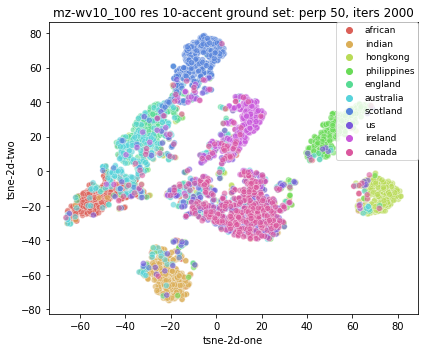

<Figure size 7200x4800 with 0 Axes>

In [23]:

resource_dirs = ['african', 'indian', 'hongkong', 'philippines', 
           'england', 'australia', 'scotland', 'us', 'ireland', 
           'canada']
df_resource = df_from("test", 'wv10_100', resource_dirs)
tnse_plot(resource_dirs, "mz-wv10_100 res", "res-wv10_100", df_resource)

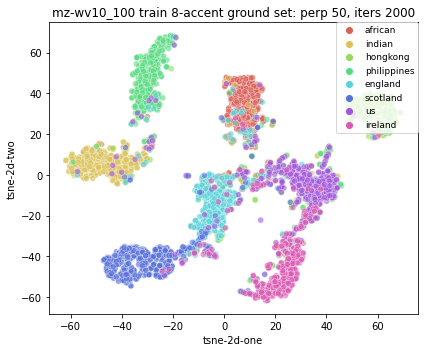

<Figure size 7200x4800 with 0 Axes>

In [22]:
tnse_plot(train_dirs, "mz-wv10_100 train", "train-wv10_100", df_train)

In [54]:
import time

def _color_map(dirs):
    color = ["midnightblue", "darkgreen", 'lime', 'pink', 'red', 
             'yellow', 'black']
    color_map = {}
    for _dir, color in zip(dirs+['query_set', 'selected_set'], color):
        color_map[_dir] = color
    return color_map

def df_from(file_type, feature):
    t1 = time.time()
    dirs = ['hindi', 'chinese', 'spanish', 'arabic', 'korean', 'vietnamese']
    ground_list, ground_list_Y, ground_features = [], [], []
    for i, _dir in enumerate(dirs):
        
        selection_file_path = base_dir + _dir + '/manifests/{}.json'.format(file_type)
        selection_file_list = [json.loads(line.strip()) for line in open(selection_file_path)]
        selection_file_list = selection_file_list[:1000]
        ground_list.extend(selection_file_list)
        ground_features.append(load_features(selection_file_path, feature)[:1000])
        
        print(_dir+" has "+str(len(selection_file_list))+" samples.")
        ground_list_Y.extend([i]*len(selection_file_list))
    
    ground_features = np.concatenate(ground_features, axis=0)
    ground_features_Y = np.asarray(ground_list_Y).reshape(-1, 1) 
    print(len(ground_list), ground_features.shape, ground_features_Y.shape)
    
    X, y = ground_features, ground_features_Y
    
    print(X.shape, y.shape)
    print('\n\n')
    feat_cols = ['dim'+str(i) for i in range(X.shape[1])]
    df = pd.DataFrame(X, columns=feat_cols)
    df['y'] = y
    
    label_map = dict(enumerate(dirs))
    df['label'] = df['y'].apply(lambda i: label_map[i])

    perp=0.83*(X.shape[0]**0.5)
    iters=3000
    tsne = TSNE(n_components=2, verbose=1, perplexity=perp, n_iter=iters)
    tsne_results = tsne.fit_transform(df[feat_cols].values)

    df['tsne-2d-one'] = tsne_results[:,0]
    df['tsne-2d-two'] = tsne_results[:,1]
    
    t2 = time.time()
    print("in {:.1f} min".format((t2-t1)/60))
    return df

In [19]:
df = df_from("selection", 'w2v2')

(1, 768)
hindi has 1000 samples.
(1, 768)
chinese has 1000 samples.
(1, 768)
spanish has 1000 samples.
(1, 768)
arabic has 1000 samples.
(1, 768)
korean has 1000 samples.
(1, 768)
vietnamese has 1000 samples.
6000 (6000, 768) (6000, 1)
(6000, 768) (6000, 1)



[t-SNE] Computing 193 nearest neighbors...
[t-SNE] Indexed 6000 samples in 0.004s...
[t-SNE] Computed neighbors for 6000 samples in 1.454s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6000
[t-SNE] Computed conditional probabilities for sample 2000 / 6000
[t-SNE] Computed conditional probabilities for sample 3000 / 6000
[t-SNE] Computed conditional probabilities for sample 4000 / 6000
[t-SNE] Computed conditional probabilities for sample 5000 / 6000
[t-SNE] Computed conditional probabilities for sample 6000 / 6000
[t-SNE] Mean sigma: 1.095664
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.972534
[t-SNE] KL divergence after 3000 iterations: 1.255419


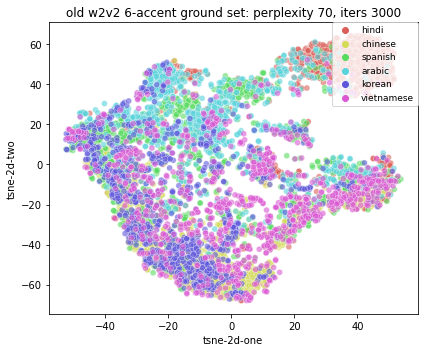

<Figure size 7200x4800 with 0 Axes>

In [21]:
fig = plt.figure(figsize=(6,5))
_ax = fig.add_subplot(1,1,1)
_ax.title.set_text('old w2v2 {}-accent ground set: perplexity {}, iters {}'.format(len(dirs), int(perp), iters))
g = sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="label", palette=sns.color_palette("hls", len(dirs)), data=df, legend="full", alpha=0.6, ax = _ax)
plt.figure(dpi=1200)
g.legend(loc='upper right', bbox_to_anchor=(1.013, 1.017), prop={'size':9}, markerscale=1)
fig.tight_layout()

In [22]:
fig.savefig('L2_t-SNE-old-w2v2-{}-{}.svg'.format(int(perp), iters))

In [23]:
df_new = df_from("test", 'w2v2')

(1, 768)
hindi has 1000 samples.
(1, 768)
chinese has 1000 samples.
(1, 768)
spanish has 1000 samples.
(1, 768)
arabic has 1000 samples.
(1, 768)
korean has 1000 samples.
(1, 768)
vietnamese has 1000 samples.
6000 (6000, 768) (6000, 1)
(6000, 768) (6000, 1)



[t-SNE] Computing 193 nearest neighbors...
[t-SNE] Indexed 6000 samples in 0.007s...
[t-SNE] Computed neighbors for 6000 samples in 1.617s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6000
[t-SNE] Computed conditional probabilities for sample 2000 / 6000
[t-SNE] Computed conditional probabilities for sample 3000 / 6000
[t-SNE] Computed conditional probabilities for sample 4000 / 6000
[t-SNE] Computed conditional probabilities for sample 5000 / 6000
[t-SNE] Computed conditional probabilities for sample 6000 / 6000
[t-SNE] Mean sigma: 0.791269
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.975227
[t-SNE] KL divergence after 3000 iterations: 1.124899


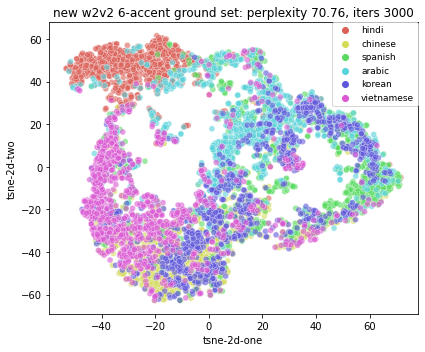

<Figure size 7200x4800 with 0 Axes>

In [24]:
fig = plt.figure(figsize=(6,5))
_ax = fig.add_subplot(1,1,1)
_ax.title.set_text('new w2v2 {}-accent ground set: perplexity {:.2f}, iters {}'.format(len(dirs), perp, iters))
g = sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="label", palette=sns.color_palette("hls", len(dirs)), data=df_new, legend="full", alpha=0.6, ax = _ax)
plt.figure(dpi=1200)
g.legend(loc='upper right', bbox_to_anchor=(1.013, 1.017), prop={'size':9}, markerscale=1)
fig.tight_layout()

In [25]:
fig.savefig('L2_t-SNE-new-w2v2-{}-{}.svg'.format(int(perp), iters))

In [26]:
df_39 = df_from("test", '39')

(1, 39)
hindi has 1000 samples.
(1, 39)
chinese has 1000 samples.
(1, 39)
spanish has 1000 samples.
(1, 39)
arabic has 1000 samples.
(1, 39)
korean has 1000 samples.
(1, 39)
vietnamese has 1000 samples.
6000 (6000, 39) (6000, 1)
(6000, 39) (6000, 1)



[t-SNE] Computing 193 nearest neighbors...
[t-SNE] Indexed 6000 samples in 0.001s...
[t-SNE] Computed neighbors for 6000 samples in 1.181s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6000
[t-SNE] Computed conditional probabilities for sample 2000 / 6000
[t-SNE] Computed conditional probabilities for sample 3000 / 6000
[t-SNE] Computed conditional probabilities for sample 4000 / 6000
[t-SNE] Computed conditional probabilities for sample 5000 / 6000
[t-SNE] Computed conditional probabilities for sample 6000 / 6000
[t-SNE] Mean sigma: 12.184713
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.451698
[t-SNE] KL divergence after 3000 iterations: 1.012245


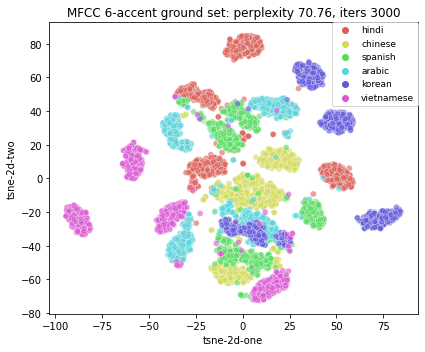

<Figure size 7200x4800 with 0 Axes>

In [27]:
fig = plt.figure(figsize=(6,5))
_ax = fig.add_subplot(1,1,1)
_ax.title.set_text('MFCC {}-accent ground set: perplexity {:.2f}, iters {}'.format(len(dirs), perp, iters))
g = sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="label", palette=sns.color_palette("hls", len(dirs)), data=df_39, legend="full", alpha=0.6, ax = _ax)
plt.figure(dpi=1200)
g.legend(loc='upper right', bbox_to_anchor=(1.013, 1.017), prop={'size':9}, markerscale=1)
fig.tight_layout()

In [29]:
fig.savefig('L2_t-SNE-mfcc-{}-{}.svg'.format(int(perp), iters))

In [40]:
import time
base_dir = '../mz-isca/classifier-data/val/'
feature = 'wv8'
jsons = [f.name for f in os.scandir(base_dir) if not(f.is_dir())]

def load_features_dir(file_path, feature):
    features = []
    file_dir, accent = '/'.join(file_path.split('/')[:-1]), file_path.split('/')[-1].split('.json')[0]
#     print(file_dir, accent)
    with open("{}/{}/{}_{}.file".format(file_dir, feature, accent, feature), 'rb') as f:
        while True:
            try:
                features.append(pickle.load(f))
            except EOFError:
                break
    print(features[-1].shape)
    features = np.concatenate(features, axis=0)
    return features

def df_from_val(feature):
    t1 = time.time()
    
    base_dir = '../mz-isca/classifier-data/val/'
    feature = 'wv8'
    jsons = [f.name for f in os.scandir(base_dir) if not(f.is_dir())]
    print(jsons)
    
    ground_list, ground_list_Y, ground_features = [], [], []
    
    for i, json_file in enumerate(jsons):
        
        selection_file_path = base_dir + json_file
        selection_file_list = [json.loads(line.strip()) for line in open(selection_file_path)]
        selection_file_list = selection_file_list[:500]
        ground_list.extend(selection_file_list)
        ground_features.append(load_features_dir(selection_file_path, feature)[:500])
        
        print(json_file+" has "+str(len(selection_file_list))+" samples.")
        ground_list_Y.extend([i]*len(selection_file_list))
    
    ground_features = np.concatenate(ground_features, axis=0)
    ground_features_Y = np.asarray(ground_list_Y).reshape(-1, 1) 
    print(len(ground_list), ground_features.shape, ground_features_Y.shape)
    
    X, y = ground_features, ground_features_Y
    
    print(X.shape, y.shape)
    print('\n\n')
    feat_cols = ['dim'+str(i) for i in range(X.shape[1])]
    df = pd.DataFrame(X, columns=feat_cols)
    df['y'] = y
    
    label_map = dict(enumerate(jsons))
    df['label'] = df['y'].apply(lambda i: label_map[i])

    perp=0.83*(X.shape[0]**0.5)
    iters=3000
    tsne = TSNE(n_components=2, verbose=1, perplexity=perp, n_iter=iters)
    tsne_results = tsne.fit_transform(df[feat_cols].values)

    df['tsne-2d-one'] = tsne_results[:,0]
    df['tsne-2d-two'] = tsne_results[:,1]
    
    t2 = time.time()
    print("in {:.1f} min".format((t2-t1)/60))
    return df

In [41]:
df_val = df_from_val('wv8')

['philippines.json', 'scotland.json', 'hongkong.json', 'indian.json', 'us.json', 'england.json', 'ireland.json', 'african.json']
../mz-isca/classifier-data/val philippines
(1, 768)
philippines.json has 500 samples.
../mz-isca/classifier-data/val scotland
(1, 768)
scotland.json has 500 samples.
../mz-isca/classifier-data/val hongkong
(1, 768)
hongkong.json has 500 samples.
../mz-isca/classifier-data/val indian
(1, 768)
indian.json has 500 samples.
../mz-isca/classifier-data/val us
(1, 768)
us.json has 500 samples.
../mz-isca/classifier-data/val england
(1, 768)
england.json has 500 samples.
../mz-isca/classifier-data/val ireland
(1, 768)
ireland.json has 500 samples.
../mz-isca/classifier-data/val african
(1, 768)
african.json has 500 samples.
4000 (4000, 768) (4000, 1)
(4000, 768) (4000, 1)



[t-SNE] Computing 158 nearest neighbors...
[t-SNE] Indexed 4000 samples in 0.003s...
[t-SNE] Computed neighbors for 4000 samples in 0.745s...
[t-SNE] Computed conditional probabilities for sample

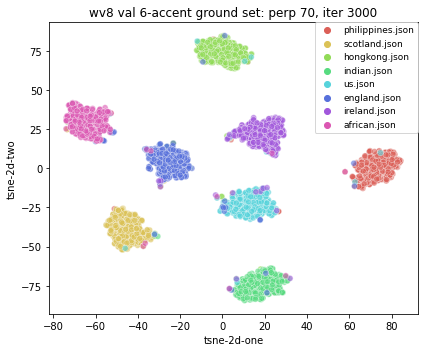

<Figure size 7200x4800 with 0 Axes>

In [43]:
fig = plt.figure(figsize=(6,5))
_ax = fig.add_subplot(1,1,1)
_ax.title.set_text('wv10 val {}-accent ground set: perp {}, iter {}'.format(len(dirs), int(perp), iters))
g = sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="label", palette=sns.color_palette("hls", len(jsons)), data=df_val, legend="full", alpha=0.6, ax = _ax)
plt.figure(dpi=1200)
g.legend(loc='upper right', bbox_to_anchor=(1.013, 1.017), prop={'size':9}, markerscale=1)
fig.tight_layout()

In [73]:
import time
base_dir = '../mz-isca/classifier-data/inval/'
jsons = [f.name for f in os.scandir(base_dir) if not(f.is_dir())]

def load_features_dir(file_path, feature):
    features = []
    file_dir, accent = '/'.join(file_path.split('/')[:-1]), file_path.split('/')[-1].split('.json')[0]
#     print(file_dir, accent)
    with open("{}/{}/{}_{}.file".format(file_dir, feature, accent, feature), 'rb') as f:
        while True:
            try:
                features.append(pickle.load(f))
            except EOFError:
                break
    print(features[-1].shape)
    features = np.concatenate(features, axis=0)
    return features

def df_from_val(feature):
    t1 = time.time()
    
    base_dir = '../mz-isca/classifier-data/inval/'
    jsons = [f.name for f in os.scandir(base_dir) if not(f.is_dir())]
    print(jsons)
    
    ground_list, ground_list_Y, ground_features = [], [], []
    
    for i, json_file in enumerate(jsons):
        
        selection_file_path = base_dir + json_file
        selection_file_list = [json.loads(line.strip()) for line in open(selection_file_path)]
        selection_file_list = selection_file_list[:350]
        ground_list.extend(selection_file_list)
        ground_features.append(load_features_dir(selection_file_path, feature)[:350])
        
        print(json_file+" has "+str(len(selection_file_list))+" samples.")
        ground_list_Y.extend([i]*len(selection_file_list))
    
    ground_features = np.concatenate(ground_features, axis=0)
    ground_features_Y = np.asarray(ground_list_Y).reshape(-1, 1) 
    print(len(ground_list), ground_features.shape, ground_features_Y.shape)
    
    X, y = ground_features, ground_features_Y
    
    print(X.shape, y.shape)
    print('\n\n')
    feat_cols = ['dim'+str(i) for i in range(X.shape[1])]
    df = pd.DataFrame(X, columns=feat_cols)
    df['y'] = y
    
    label_map = dict(enumerate(jsons))
    df['label'] = df['y'].apply(lambda i: label_map[i])

    perp=70
    iters=2500
    tsne = TSNE(n_components=2, verbose=1, perplexity=perp, n_iter=iters)
    tsne_results = tsne.fit_transform(df[feat_cols].values)

    df['tsne-2d-one'] = tsne_results[:,0]
    df['tsne-2d-two'] = tsne_results[:,1]
    
    t2 = time.time()
    print("in {:.1f} min".format((t2-t1)/60))
    return df

In [74]:
df_inval = df_from_val('wv108')

['philippines.json', 'scotland.json', 'hongkong.json', 'indian.json', 'us.json', 'england.json', 'ireland.json', 'african.json']
(1, 8)
philippines.json has 350 samples.
(1, 8)
scotland.json has 350 samples.
(1, 8)
hongkong.json has 350 samples.
(1, 8)
indian.json has 350 samples.
(1, 8)
us.json has 350 samples.
(1, 8)
england.json has 350 samples.
(1, 8)
ireland.json has 350 samples.
(1, 8)
african.json has 350 samples.
2800 (2800, 8) (2800, 1)
(2800, 8) (2800, 1)



[t-SNE] Computing 211 nearest neighbors...
[t-SNE] Indexed 2800 samples in 0.006s...
[t-SNE] Computed neighbors for 2800 samples in 0.249s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2800
[t-SNE] Computed conditional probabilities for sample 2000 / 2800
[t-SNE] Computed conditional probabilities for sample 2800 / 2800
[t-SNE] Mean sigma: 1.213031
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.896873
[t-SNE] KL divergence after 2500 iterations: 0.945580
in 7.7 min


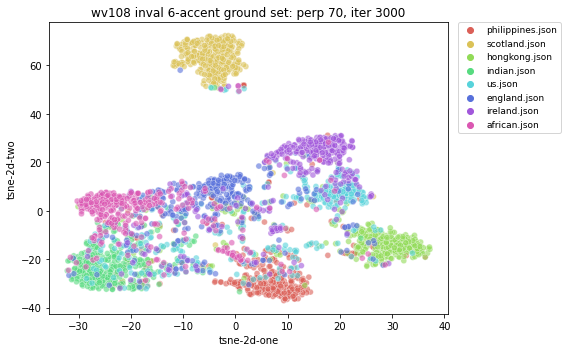

<Figure size 7200x4800 with 0 Axes>

In [76]:
fig = plt.figure(figsize=(8,5))
_ax = fig.add_subplot(1,1,1)
_ax.title.set_text('wv10 inval {}-accent ground set: perp {}, iter {}'.format(len(dirs), int(perp), iters))
g = sns.scatterplot(x="tsne-2d-one", y="tsne-2d-two", hue="label", palette=sns.color_palette("hls", len(jsons)), data=df_inval, legend="full", alpha=0.6, ax = _ax)
plt.figure(dpi=1200)
g.legend( loc='upper left', bbox_to_anchor=(1.013, 1.017), prop={'size':9}, markerscale=1)
fig.tight_layout()
fig.savefig('mz-inval-wv108-{}-{}.svg'.format(int(perp), iters))